### Course 02443: Stochastic Simulation - Exercises
**Authors: David Miles-Skov and Patrick Jensen Martins**

------------------------------

### Exercise 1:   Generation and testing of random numbers

In [9]:
# imports
import matplotlib.pyplot as plt
import scipy.stats as stat
import numpy as np
import seaborn as sns
import random

**1. Write a program implementing a linear congruential generator (LCG). Be sure that the program works correctly using only integer representation.**

Using the definition of an LCG as defined in the lecture:

$x_i = mod(a x_i + c, \ M)$

Providing a pseudo-random sample adhering to the uniform distribution $U(0,1)$ via the following: $U_i = \frac{x_i}{M}$

Implementing as a generator:

In [3]:
def LCG(M, a, c, seed, n):
    for i in range(n):
        seed = (a*seed+c)%M
        yield seed

(a) Generate 10.000 (pseudo-) random numbers and present these numbers in a histogramme (e.g. 10 classes).

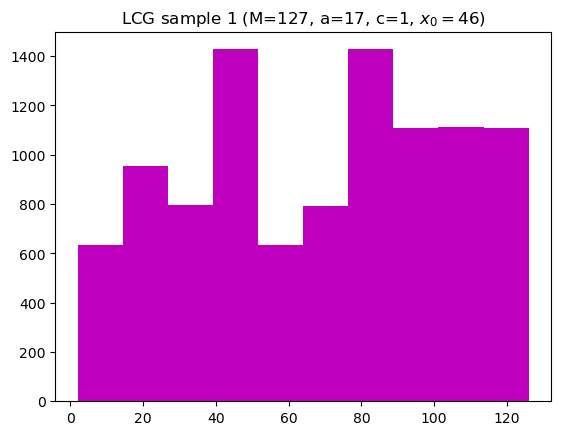

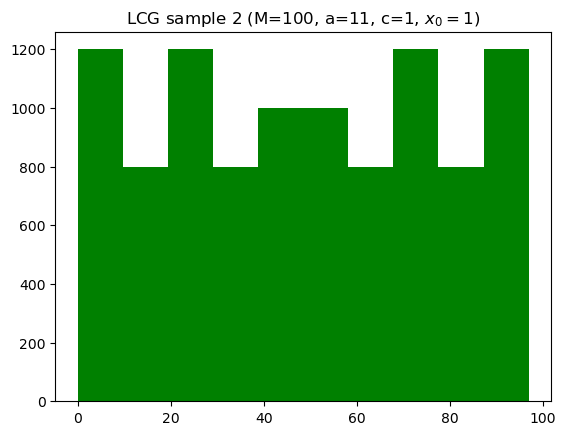

In [14]:
# Generating numbers

# LCG 1

M = 127
a = 17
c = 1
seed = 46

LCG_1 = list(LCG(M, a, c, seed, 10000))

# LCG 2

M = 100
a = 11
c = 1
seed = 1

LCG_2 = list(LCG(M, a, c, seed, 10000))


plt.hist(LCG_1, 10, color="m")
plt.title(r"LCG sample 1 (M=127, a=17, c=1, $x_0 =46$)")
plt.show()


plt.hist(LCG_2, 10, color="g")
plt.title(r"LCG sample 2 (M=100, a=11, c=1, $x_0 =1$)")
plt.show()

**(b) Evaluate the quality of the generator by graphical descriptive statistics (histogrammes, scatter plots) and statistical tests - χ2 ,Kolmogorov-Smirnov, run-tests, and correlation test.**

**i) Graphical Descriptive Statistics**

From the histograms we can see that both LCG generated samples do not produce a histogram that would be expected for a normal distribution. Thus, leading to the conclusion that the LCG with given parameters do not produce perfectly random samples (as expected).

Comparing with python's built-in random number generator:

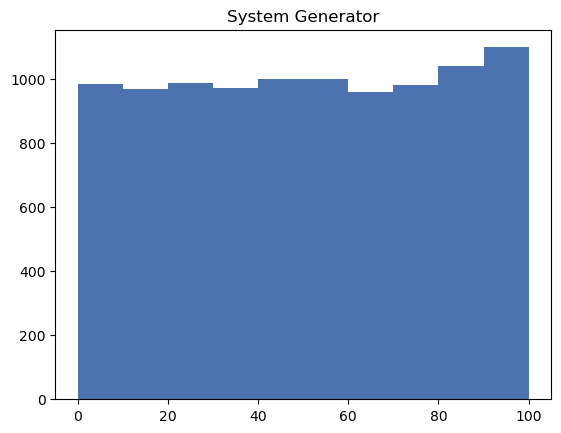

In [15]:
plt.hist([random.randint(0,100) for i in range(10000)], 10)
plt.title(r"System Generator")
plt.show()

Examining scatter plots of two samples

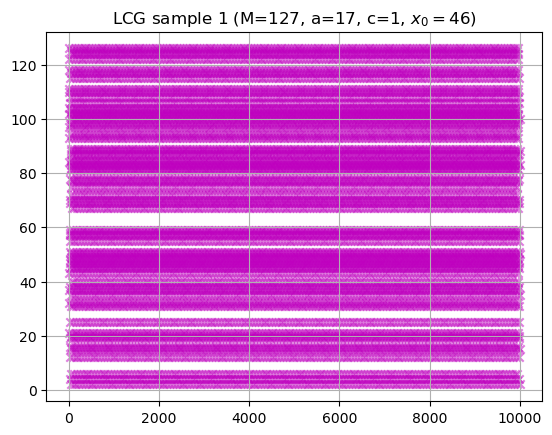

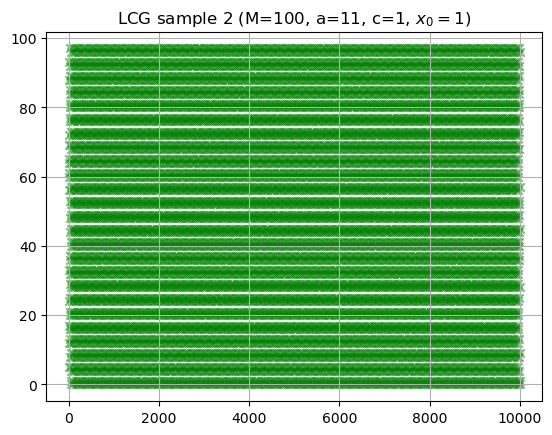

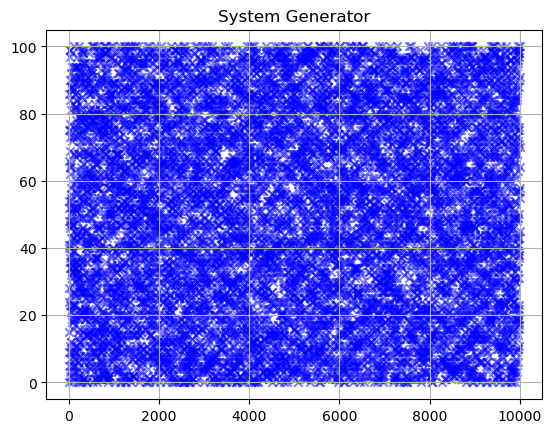

In [18]:
plt.scatter(list(range(10000)), LCG_1,alpha=0.5, marker="x", color="m")
plt.title(r"LCG sample 1 (M=127, a=17, c=1, $x_0 =46$)")
plt.grid()
plt.show()

plt.scatter(list(range(10000)), LCG_2, marker="x", color="g",alpha=0.5)
plt.title(r"LCG sample 2 (M=100, a=11, c=1, $x_0 =1$)")
plt.grid()
plt.show()

plt.scatter(list(range(10000)), [random.randint(0,100) for i in range(10000)], marker="x", color="b",alpha=0.5)
plt.title(r"System Generator")
plt.grid()
plt.show()

Long bands of repeating values can be seen in the LCG, further confirming the lack of randomness.

**ii) Evaluating Distribution**
- 1: $\chi^2$ test
- 2: Kolmogorov-Smirnov test

Proceeding with $\chi^2$ test:

$H_0$: Bins have equal proportions $p_1 = p_2 = ... = p_{10} $

$H_1$: Proportions of bins not equal $p_1 \neq p_2 \neq .. \neq p_{10}$

$\alpha = 0.05$

Acceptance of the null hypothesis supports the "randomness" of the sample.

In [22]:
def chi_squared(numbers, num_bins):
    
    n_expected = len(numbers)/num_bins #  Uniform distribution -> Each "bin" has an equal number of values
    l = min(numbers)
    h = max(numbers)
    step = int((h-l)/num_bins)
    test_stat = 0
    df = num_bins-1

    for i in range(1, num_bins+1):

        n_observed = len([j for j in numbers if j >= l+step*(i-1) and j < l+step*i])
        test_stat += ((n_expected-n_observed)**2)/n_expected
    
    p = 1 - stat.chi2.cdf(test_stat, df)
    
    return round(test_stat, 6), round(p, 6)

In [24]:
test_1_chi2, p_1 = chi_squared(LCG_1, 10)
test_2_chi2, p_2 = chi_squared(LCG_2, 10)
sys_gen_chi2, p_sys = chi_squared([random.randint(0,100) for i in range(10000)], 10)
print(f"Test-statistic:\tP-value:\nLCG 1: {test_1_chi2}\t{p_1}\nLCG 2: {test_2_chi2}\t{p_2}\nBuilt-in: {sys_gen_chi2}\t{p_sys}")

Test-statistic:	P-value:
LCG 1: 665.734	0.0
LCG 2: 160.0	0.0
Built-in: 10.445	0.315675


The only sample where the null hypothesis is accepted is that generated by Python's built-in generator. For the LCG generated samples, the null hypothesis is rejected - there is insufficient evidence (at the 5% significance level) to conclude that the variations in randomness are due to chance alone.

Now proceeding with the Kolmogorov Smirnov test:
- $H_0$: Distribution is uniform
- $H_1$: Distribution is not uniform

In [34]:
def gen_ecdf(numbers):
    x = np.sort(numbers)
    n = len(x)
    y = np.arange(1, n+1) / n
    return(x,y)


def kolmogorov_smirnov(numbers):

    
    x,y = gen_ecdf(numbers)
    l, h = min(numbers), max(numbers)
    m, c =  (1/(h-l)), l/(l-h)
    ideal_y = [m*i+c for i in x] # Uniform distribution (ideal) -> linear cdf

    # For visual comparison
    
    plt.plot(x, ideal_y, label="Ideal CDF")
    plt.plot(x, y, label="ECDF")
    plt.legend()
    plt.ylabel(r"$P(X \leq x)$")
    plt.xlabel(r"$x$")
    plt.grid()
    plt.title("ECDF vs Ideal CDF")
    plt.show()


    D = max(abs(np.array(y) - np.array(ideal_y)))
    test_stat =  (np.sqrt(len(numbers)) + 0.12 + (0.11/np.sqrt(len(numbers)))) * D
    
    return test_stat

--- LCG 1 ---


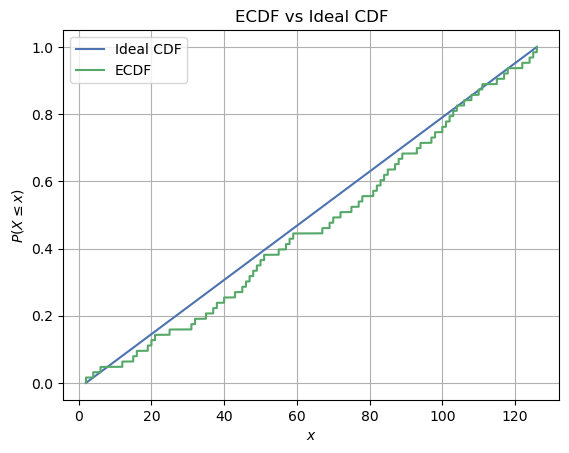

--- LCG 2 ---


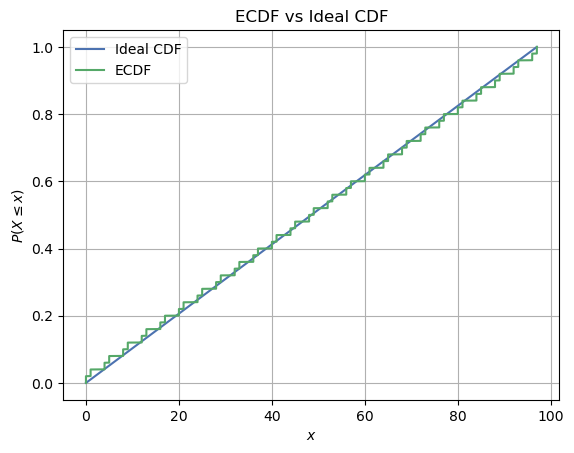

--- System Generator ---


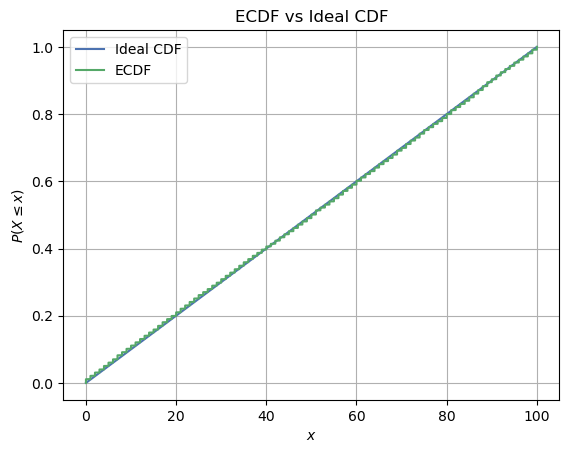

Test-statistics:
LCG 1: 8.13952245870968
LCG 2: 2.9726677113402062
System Generator: 1.21146531 



In [36]:
print("--- LCG 1 ---")
LCG_1_KS = kolmogorov_smirnov(LCG_1)
print("--- LCG 2 ---")
LCG_2_KS = kolmogorov_smirnov(LCG_2)
print("--- System Generator ---")
sys_KS = kolmogorov_smirnov([random.randint(0,100) for _ in range(10000)])
print(f"Test-statistics:\nLCG 1: {LCG_1_KS}\nLCG 2: {LCG_2_KS}\nSystem Generator: {sys_KS} \n")

Refering to the table in slides, the critical value for the Kolmogorov-Smirnov test, at a signficance level of $\alpha = 0.05$, is $1.358$.

Both LCG generated samples have a test statistic above the critical value. Therefore, the null hypothesis is rejected and there is sufficient evidence to conclude that the distributions of the LCG samples are not uniform.

**iii) Tests for Correlation**
- Visual tests
- Run tests
- Correlation tests

Visual tests - Plots of $U_i$ versus $U_{i+1}$

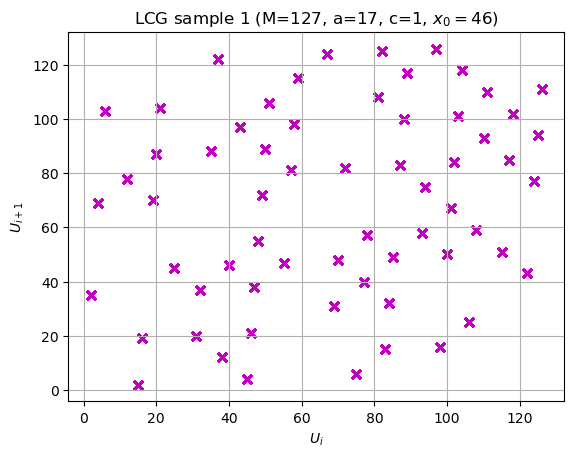

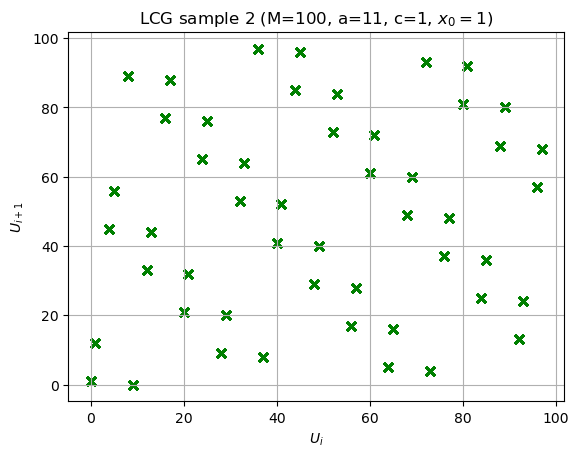

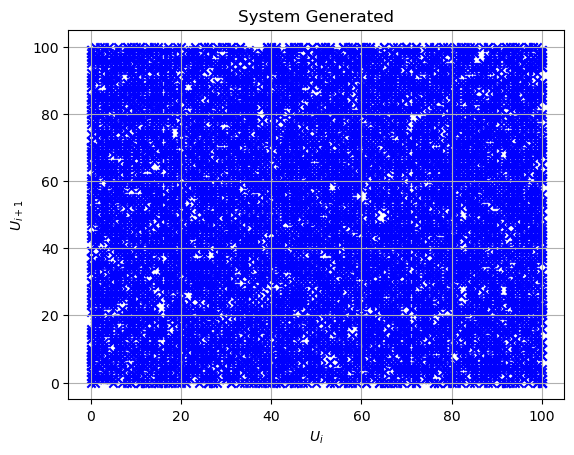

In [61]:
def partition_sample(data):
    U_i, U_i1 = [], []
    for i in range(len(data)-1):
        U_i.append(data[i])
        U_i1.append(data[i+1])
    return U_i, U_i1

LCG_1_Ui,LCG_1_Ui1 = partition_sample(LCG_1)
LCG_2_Ui,LCG_2_Ui1 = partition_sample(LCG_2)
sys_Ui,sys_Ui1 = partition_sample([random.randint(0,100) for _ in range(10000)])

plt.scatter(LCG_1_Ui, LCG_1_Ui1, marker="x", c="m")
plt.grid()
plt.ylabel(r"$U_{i+1}$")
plt.xlabel(r"$U_{i}$")
plt.title(r"LCG sample 1 (M=127, a=17, c=1, $x_0 =46$)")
plt.show()


plt.scatter(LCG_2_Ui, LCG_2_Ui1, marker="x", c="g")
plt.grid()
plt.ylabel(r"$U_{i+1}$")
plt.xlabel(r"$U_{i}$")
plt.title(r"LCG sample 2 (M=100, a=11, c=1, $x_0 =1$)")
plt.show()

plt.scatter(sys_Ui, sys_Ui1, marker="x", c="b")
plt.grid()
plt.ylabel(r"$U_{i+1}$")
plt.xlabel(r"$U_{i}$")
plt.title(r"System Generated")
plt.show()

From the plots above, it is clear that the second LCG sample has a high level of correlation betweem adjacent sample points

Run test 1 - Above/Below:

$H_0$: Numbers were produced in an independent manner

$H_1$: Numbers were not produced in an independent manner

Test Statistic: $Z = \frac{R - \bar{R}}{s_R}$

Where: $\bar{R} = \frac{2 n_1 n_2}{n_1 + n_2} + 1$


And: $ s_R = \sqrt{\frac{2 n_1 n_2 (2 n_1 n_2 - n_1 - n_2)}{(n_1 + n_2)^2 (n_1 + n_2 + 1)}}$

Reject null hypothesis if:

$|\mathbf{Z}| > \mathbf{Z}_{1-\alpha}$

at $5\%$ significance level: $\mathbf{Z}_{1-\alpha} = 1.96$

In [43]:
def run_test_1(numbers):

    median = np.median(np.array(numbers))
    n_1 = len([i for i in numbers if i > median])
    n_2 = len([i for i in numbers if i < median])

    runs_expected = 2*n_1*n_2/(n_1+n_2) + 1 # Mean


    numerator = 2*n_1*n_2*(2*n_1*n_2-n_1-n_2)
    denominator = ((n_1+n_2)**2)*(n_1+n_2+1)

    s_R = np.sqrt(numerator/denominator) # Variance

    # calculating number of runs

    num_runs = 0
    prev_val = ""
    if numbers[0]>median: prev_val = "above"
    else: prev_val = "below"


    for i in numbers[1:]:
        if prev_val == "above" and i < median: 
            num_runs += 1
            prev_val = "below"
        elif prev_val == "below" and i > median:
            num_runs += 1
            prev_val = "above"

    Z = abs((num_runs-runs_expected)/s_R)

    return Z

In [44]:
LCG_1_run1 = run_test_1(LCG_1)
LCG_2_run1 = run_test_1(LCG_2)
sys_run1 = run_test_1([random.randint(0,100) for i in range(10000)])

print("--- Run Test 1 ---")
print(f"Test-statistics:\nLCG 1: {LCG_1_run1}\nLCG 2: {LCG_2_run1}\nSystem Generator: {sys_run1}\n")

--- Run Test 1 ---
Test-statistics:
LCG 1: 9.637866470774368
LCG 2: 4.020603075387816
System Generator: 0.6335084023867772



Run test 2 - Up/Down:

- Create vector $R = [O_{1}, O_{2}, ..., O_{n \geq 6}]^T$ where $O_i$ is the number of observed runs of length $i$.

- Calculate test statistic via the equation: $Z = \frac{1}{n-6} (\mathbf{R}-n\mathbf{B})^T A(\mathbf{R} - n \mathbf{B})$

where $A$ and $\mathbf{B}$ are provided.

In [54]:
def run_test_2(numbers):
    R = np.zeros(shape=6, dtype=np.int32)
    current_run = 1
    for i in range(1, len(numbers)):
        if numbers[i] < numbers[i-1]:
            if current_run >= 6:
                R[-1] += 1
            else:
                R[current_run-1] += 1
            current_run = 1
        else:
            current_run += 1
    
    B = np.array([1/6, 5/24, 11/120, 19/720, 29/5040, 1/840])
    A = np.array(
            [[4529.4, 9044.9, 13568, 18091, 22615, 27892],
             [9044.9, 18097, 27139, 36187, 45234, 55789], 
             [13568, 27139, 40721, 54281, 67852, 83685], 
             [18091, 36187, 54281, 72414, 90470, 111580], 
             [22615, 45234, 67852, 90470, 113262, 139476], 
             [27892, 55789, 83685, 111580, 139476, 172860]], dtype=float)
    n = len(numbers)
    Z1 = np.transpose((R-n*B))
    Z1 = np.matmul(Z1, A)
    Z2 = (R-n*B)
    Z = (1/(n-6))*np.matmul(Z1, Z2)

    return Z

The test statistic follows a $\chi^2(6)$ distribution

In [55]:
LCG_1_run2 = run_test_2(LCG_1)
LCG_2_run2 = run_test_2(LCG_2)
sys_run2 = run_test_2([random.randint(0,100) for i in range(10000)])

print("--- Run Test 2 ---")
print(f"Test-statistics:\nLCG 1: {LCG_1_run1}\nLCG 2: {LCG_2_run1}\nSystem Generator: {sys_run1}\n")

--- Run Test 2 ---
Test-statistics:
LCG 1: 9.637866470774368
LCG 2: 4.020603075387816
System Generator: 0.6335084023867772



The upper-tail critical value of a $\chi^2$ disribution with $6$ degrees of freedom is 12.592 ($\alpha=0.05$). All generated samples have values below this - Null hypothesis is accepted.

In [47]:
def run_test_3(numbers):
    # converting 
    new_lst = []
    for i in range(len(numbers)-1):
        if numbers[i] < numbers[i+1]:
            new_lst.append("<")
        else:
            new_lst.append(">")
    
    # counting total runs
    X = 0
    for i in range(len(new_lst)-1):
        if new_lst[i] != new_lst[i+1]:
            X+=1
        
    n = len(numbers)

    Z = (X-(2*n-1)/3)/np.sqrt((16*n-29)/90)

    return Z

In [48]:
LCG_1_run3 = run_test_3(LCG_1)
LCG_2_run3 = run_test_3(LCG_2)
sys_run3 = run_test_3([random.randint(0,100) for i in range(10000)])

print("--- Run Test 3 ---")
print(f"Test-statistics:\nLCG 1: {LCG_1_run1}\nLCG 2: {LCG_2_run1}\nSystem Generator: {sys_run1}\n")

--- Run Test 3 ---
Test-statistics:
LCG 1: 9.637866470774368
LCG 2: 4.020603075387816
System Generator: 0.6335084023867772



Correlation test

- Estimated correlation: $c_h = \frac{1}{n-h} \sum^{n-h}_{i=1} U_i U_{i+h} \sim N(0.25, \frac{7}{144n})$

In [49]:
def auto_corr(U, h):
    s = 0
    n = len(U)
    for i in range(n-h):
        s += U[i]*U[i+h]
    return s/(n-h)

In [52]:
print("----- Correlation test ----")
print(f"LCG 1: {round(auto_corr(LCG_1, 1), 6)}")
print(f"LCG 1: {round(auto_corr(LCG_2, 1), 6)}")
print(f"System Generator: {round(auto_corr([random.randint(0,100) for _ in range(10000)], 1), 6)}")


----- Correlation test ----
LCG 1: 4972.677368
LCG 1: 2440.242824
System Generator: 2531.540954


Making a very good LCG generator and performing all tests. (Based on *ZX81* computer)

Parameters:
- $M = 2^{16} + 1$
- $a = 75$
- $c = 74$

In [62]:
M = (2**16)+1
a = 75
c = 74

LCG_best = list(LCG(M, a, c, 1, 10000))

Histogram and scatter plot

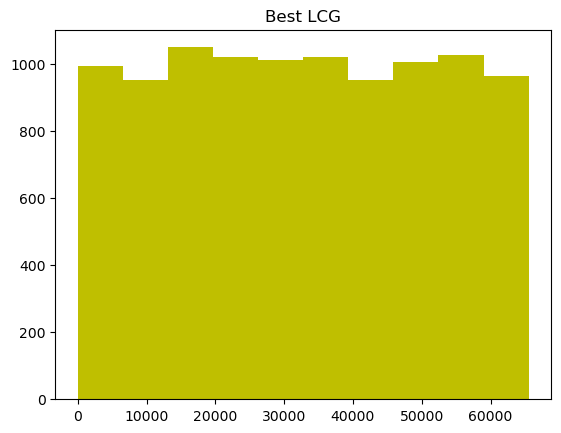

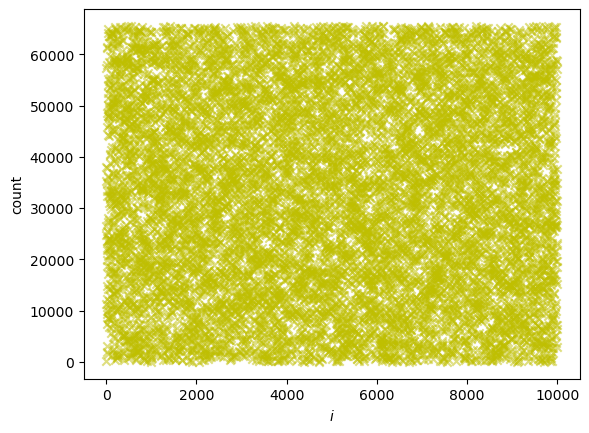

In [64]:
plt.hist(LCG_best, bins=10, color="y")
plt.title("Best LCG")
plt.show()

plt.scatter(list(range(10000)), LCG_best, marker="x", alpha=0.5, color="y")
plt.xlabel(r"$i$")
plt.ylabel(r"count")
plt.show()


Evaluating distribution

--- Chi squared ---
(10.799, 0.289739)
--- Kolmogorov-Smirnov ---


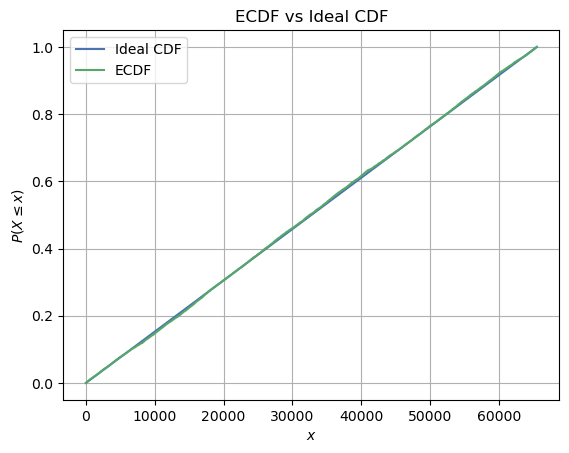

0.7848736147286127


In [66]:
print("--- Chi squared ---")
print(chi_squared(LCG_best, 10))
print("--- Kolmogorov-Smirnov ---")
print(kolmogorov_smirnov(LCG_best))

Evaluating independence:

Visually

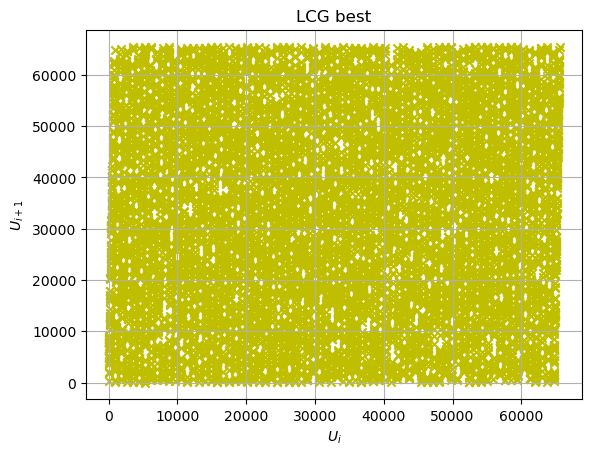

In [67]:
LCG_best_Ui,LCG_best_Ui1 = partition_sample(LCG_best)
plt.scatter(LCG_best_Ui, LCG_best_Ui1, marker="x", c="y")
plt.grid()
plt.ylabel(r"$U_{i+1}$")
plt.xlabel(r"$U_{i}$")
plt.title(r"LCG best")
plt.show()

Run tests

In [70]:
print(run_test_1(LCG_best))
print(run_test_2(LCG_best))
print(run_test_3(LCG_best))

2.3803570446325875
5.922304861879181
-1.8817257469238977


Correlation test

In [72]:
print(round(auto_corr(LCG_best, 1), 6))

1076871161.958796


**2. Apply a system available generator and perform the various statistical tests you did under Part 1 point (b) for this generator too.**

(Incorporated with exercise 1)